In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import koreanize_matplotlib



df=pd.read_csv("./winequality-white.csv", delimiter=";")

In [2]:
# 중복값 제거 
df=df[df.duplicated()==False].reset_index(drop=True)

In [3]:
df.describe()
# pH 범위 : 2.7~3.8
# alcohol 범위 : 8.0~14.2
# density 범위 : 0.98711~0.995710

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [4]:
# pH 와 Alcohol 을 feature, quality를 target으로 잡는다
df=df[["pH","alcohol","quality"]]
feature=df[df.columns[0:2]]
target=df[df.columns[2]]

# 학습 데이터, 테스트 데이터 생성
x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, stratify=target)

In [5]:
scaler=StandardScaler()
scaler.fit(x_train)
scaled_x_train=scaler.transform(x_train)
#============================================
scaler.fit(x_test)
scaler.mean_ # x_test의 평균을 출력 
scaled_x_test=scaler.transform(x_test)

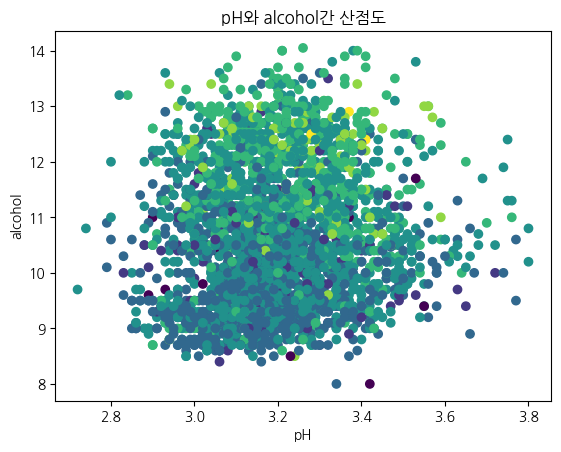

In [35]:
plt.scatter(x_train["pH"], x_train["alcohol"], c=y_train)
plt.title("pH와 alcohol간 산점도")
plt.xlabel("pH")
plt.ylabel("alcohol")
plt.show()

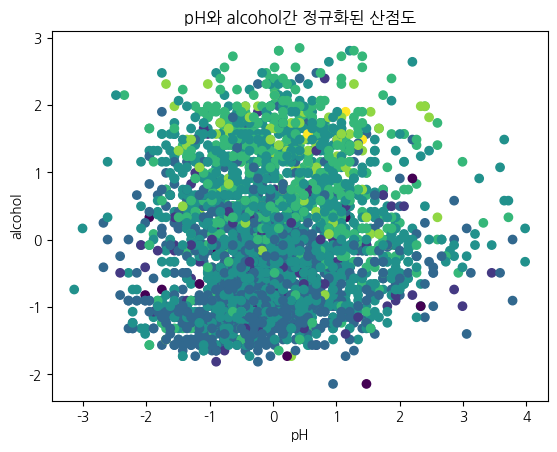

In [38]:
data=pd.DataFrame(scaled_x_train, columns=["pH","alcohol"])
plt.scatter(data["pH"], data["alcohol"], c=y_train)
plt.title("pH와 alcohol간 정규화된 산점도")
plt.xlabel("pH")
plt.ylabel("alcohol")
plt.show()

In [8]:
# 모델을 파라미터를 변경해가면서 계속 늘려간다 

max_k=scaled_x_train.shape[0]

test_scoreList=[]
train_scoreList=[]
for k in range(1,300):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_x_train, y_train)
    test_scoreList.append(model.score(scaled_x_test, y_test))
    train_scoreList.append(model.score(scaled_x_train,y_train))

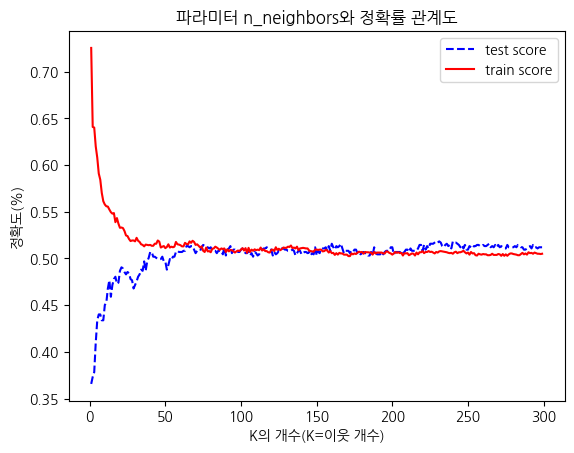

In [36]:
# pH 범위 : 2.7~3.8
# alcohol 범위 : 8.0~14.2

test_scoreList, train_scoreList
x=range(1,300)
plt.plot(x,test_scoreList,"b--" ,label="test score")
plt.plot(x,train_scoreList,"r-" ,label="train score")
plt.legend()
plt.title("파라미터 n_neighbors와 정확률 관계도")
plt.xlabel("K의 개수(K=이웃 개수)")
plt.ylabel("정확도(%)")
plt.show()

In [10]:
# 결국엔 test가 중요하기 때문에, test가 가장 높을 때의 n값을 뽑아옴
max_value=max(test_scoreList)
max_index=test_scoreList.index(max_value)
max_index+1, max_value # n의 값이 234일 때, 정확도가 최대(52%)가 된다

(229, 0.5182849936948297)

In [29]:
pH=float(input("pH를 입력하세요(정상범위 : 2.7~3.8) : "))
alcohol=float(input("alcohol를 입력하세요(정상범위 : 8.0~14.2) : "))

model=KNeighborsClassifier(n_neighbors=max_index+1)
model.fit(scaled_x_train, y_train)
new_data=pd.DataFrame([[pH,alcohol]],columns=["pH","alcohol"])
scaled_new_data = scaler.transform(new_data)
predicted=model.predict(scaled_new_data)
predicted

array([6], dtype=int64)

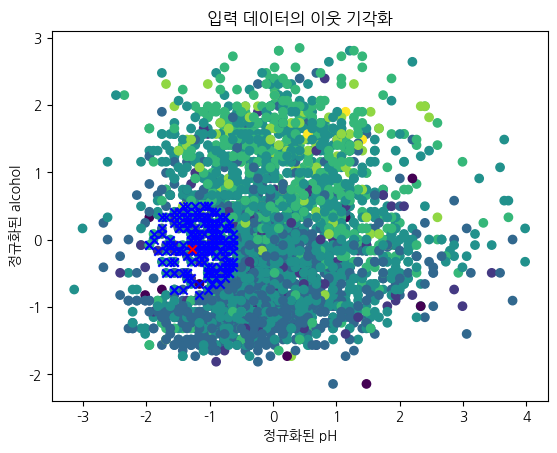

In [37]:
data=pd.DataFrame(scaled_x_train, columns=["pH","alcohol"])
plt.scatter(data["pH"], data["alcohol"],c=y_train)
_,index=model.kneighbors(scaled_new_data)
plt.scatter(data.iloc[index[0]].pH, data.iloc[index[0]].alcohol, marker="x", c="blue")
plt.scatter(scaled_new_data[0][0], scaled_new_data[0][1], marker="x", c="red")
plt.title("입력 데이터의 이웃 기각화")
plt.xlabel("정규화된 pH")
plt.ylabel("정규화된 alcohol")
plt.show()

결론 : Chat GPT 기준, 
와인의 퀄리티에 가장 영향을 많이 미치는 성분은 
1.pH와 2. alcohol이다.

해당 조건으로 데이터를 정규화하고, 
KNN을 실행해 본 결과,

n=234일 때(이웃을 234개로 잡았을 때) ,
가장 높은 예측률(51.8%)을 보인다

pH와 alcohol의 임의의 값을 범위 안에 맞게 넣었더니,
(예시)3.0, 10.4) => 6등급이라는 등급을 받았고, 
시각화를 하였다
